# midterm project - Sterling Vivier 

1.

Find all the real roots of
\begin{equation}
0.1*x^3+x^2+x-3=0
\end{equation}
using 1) bisection, and 2) Newton-Raphson methods.

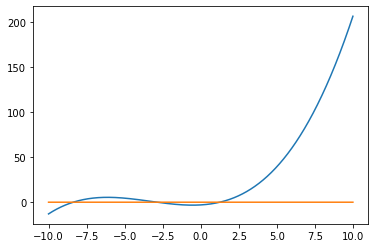

Root is at -8.379312665201724  after  29  iterations, with a precision of  9.503636988483777e-09
Root is at -2.868717490881682  after  26  iterations, with a precision of  5.428446137045739e-09
Root is at 1.248030150309205  after  28  iterations, with a precision of  6.30147400926262e-09


In [12]:
##Bisection Method:: highest power of the function is 3, thus there must be 3 roots. Making 3 guesses
import numpy as np
import matplotlib.pylab as plt

def f(x): #defining the function
    return .1*x**3+x**2+x-3

t= np.arange(-10.0, 10.0, 0.01) #setting variables to plot the function in order to see its zeros
s= f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

def bisection(xmin,xmax, Nmax, eps,f): #defining a function that calculates the zeros using bisection method
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
             xmin=x 
        else:
            xmax=x
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

eps = 1.e-8
a=-10
b=-5
nmax=100 #calling the function with my first guesses
root = bisection(a, b, nmax, eps, f)

c= -4.9
d= 0 #calling the function with my second guesses
root = bisection(c, d, nmax, eps, f)

e= 0
f1= 3 #calling the function with my third guesses
root = bisection(e, f1, nmax, eps, f)

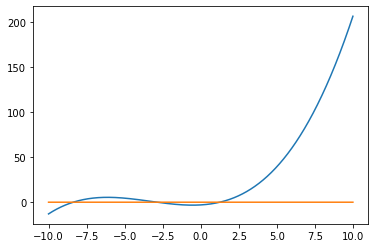

Root is at 1.2480301518999641  after  4  iterations, with a precision of  3.2356339829675562e-12
Root is at -8.379312663410358  after  4  iterations, with a precision of  2.6645352591003757e-14
Root is at -2.8687174884887923  after  2  iterations, with a precision of  4.440892098500626e-16


In [16]:
#newton rapshon method. Once again making 3 guesses
import numpy as np
import matplotlib.pylab as plt

def f(x): #defining the function
    return .1*x**3+x**2+x-3

t= np.arange(-10.0, 10.0, 0.01) #graphing the function
s= f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

def newtonraphson(x0,dx, Nmax, eps,f): #defining a function that calculates the zeros using newton-raphson
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx  
        x0 = x0 + (-f(x0)/df) 
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

eps = 1.e-8
dx=1.e-6
a=3.
nmax=100 #first guess/function call
root = newtonraphson(a, dx, nmax, eps, f)

b=-10 #second guess/function call
root = newtonraphson(b, dx, nmax, eps, f)

c=-3 #third guess/function call
root = newtonraphson(c, dx, nmax, eps, f)

#same answers obtained as bisection method, however answers have higher precision.


2

a) Please use forward Euler and Central difference methods to calculate
\begin{equation}
\frac{d ln(x)}{dx}
\end{equation}
at x=10, using a step size of 0.01.

b) Please compare your results with the analytical solution at x=10. What is the relative error of each method?

c) Please use any numerical method to calculate
\begin{equation}
\frac{d^2 ln(x)}{dx^2}
\end{equation}
at x=10, using a step size of 0.01.

forward euler 0.09995003330831587
central difference 0.10000000833332301
analytical solution 0.1 

comparison:
analytical-forward 4.996669168413903e-05
analytical-central -8.333323003872906e-09 

calculating second derivative:
second derivative -0.01000315611437948
difference between analytical & calculated 3.156114379480532e-06


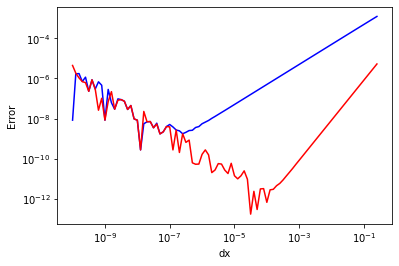

In [54]:
import numpy as np
import matplotlib.pylab as plt

#defining a function for forward euler
def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx
#defining a function for central difference
def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx
#defining a function to calculate the second derivative, using central difference
def secderi(y,x,dx):
    return (y(x+dx)+y(x-dx)-2*y(x))/(dx**2)

x=10 #x 
dx=.01 #step size

#prints the derivative using the two methods
print('forward euler', derifw(np.log, x, dx))
print('central difference',dericd(np.log, x, dx))
#the derivative of ln(x) is known to be 1/x
print('analytical solution', 1/x, '\n')
#comparing the two results against the analytical solution
print('comparison:')
print('analytical-forward', (1/x)-derifw(np.log,x,dx))
print('analytical-central', (1/x)-dericd(np.log,x,dx), '\n')

dxarr=[] #arrays for plotting results 
yarr1=[]
yarr2=[]

for dx in 10**np.arange(-10., -0.5, 0.1): 
    y=derifw(np.log,x,dx) - 1/x
    dxarr.append(dx)
    yarr1.append(y)
    y=dericd(np.log,x,dx) - 1/x
    yarr2.append(y)
        
#plotting error. central difference has a steeper slope, thus more accurate
plt.plot(dxarr, np.abs(yarr1), 'b-') 
plt.plot(dxarr, np.abs(yarr2), 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

#calculating second derivative and calling the previously defined function 
print('calculating second derivative:')
print('second derivative', secderi(np.log,x,dx))
#derivative of 1/x is -1/x^2.
print('difference between analytical & calculated', -1*1/x**2 - secderi(np.log,x, dx))


3.
Please use the RK4 method to solve
\begin{equation}
\frac{d^2y}{dx^2}+y*\frac{dy}{dx}+3*y=sin(x)
\end{equation}
with the initial condition y(x=0)=-1, y'(x=0)=1.

With the above function we must rewrite it. 
I define dy/dx =z =y'(x) && dz/dx = y''(x).

We now have two functions: 
dz/dx = sin(x) - y(x)*z - 3*y(x)=g(x, y, z) && dy/dx = z = f(x, y, z)

From the problem our initial conditions are given that: 
x=0, y(0)=-1=y and y'(0)=1=z

Using rk4 method we define a few functions: 
    k0=h*f(x0,y0,z0)
    i0=h*g(x0,y0,z0)
    k1=h*f(x0 +.5*h, y0 + .5*k0, z0+.5*i0)
    i1=h*g(x0+.5*h,y0+.5*k0,z0+.5*i0)
    k2=h+f(x0+.5*h,y0+.5*k1,z0+.5*i1) 
    i2=h*g(x0+.5*h,y0+.5*k1,z0+.5*i1)
    k3=h*f(x0+h,y0+k2,z0+i2) 
    i3=h*g(x0+h,y0+k2,z0+i2)
    
With these functions defined we can update our original values with the formulas:
     y0=y0 + 1/6*(k0 + 2*k1 + 2*k2 + k3) 
     z0=z0 + 1/6*(i0 + 2*i1 + 2*i2 + i3)
     x0 is uodated by the formula: x0=x0+h
     
These calculations are repeated an 'n' number of times, with the values being stored in y0 and z0 at the final iteration being the solution. 



In [113]:
import numpy as np
import matplotlib.pyplot as plt


h=0.001 #step size
n=100 #number of iterations
t=0

def f(x, y, z): #defining f function
    return z
def g(x, y, z): #defining g function
    return np.sin(x)-y*z-3*y

def rk4(x0, y0, z0,n): #defing rk4 method
    for i in range (n):
        print('x= ',x0,'y= ', y0,'z= ', z0)
        print('----------------------------------------------')
        k0= h*f(x0, y0, z0)
        i0=h*g(x0, y0, z0)
        k1=h*f(x0 +.5*h, y0 + .5*k0, z0+.5*i0)
        i1=h*g(x0+.5*h,y0+.5*k0,z0+.5*i0)
        k2=h+f(x0+.5*h,y0+.5*k1,z0+.5*i1)
        i2=h*g(x0+.5*h,y0+.5*k1,z0+.5*i1)
        k3=h*f(x0+h,y0+k2,z0+i2)
        i3=h*g(x0+h,y0+k2,z0+i2)

        y0=y0 + 1/6*(k0 + 2*k1 + 2*k2 + k3) #updates each y0&z0 value each iteration
        z0=z0 + 1/6*(i0 + 2*i1 + 2*i2 + i3)

        x0=x0+h
        
    print('after ', n, ' iterations ', 'y= ', y0, 'and z=', z0) #final values
            
rk4(0, -1, 1, n)

x=  0 y=  -1 z=  1
----------------------------------------------
x=  0.001 y=  -0.6649985834174623 z=  1.0033318292490028
----------------------------------------------
x=  0.002 y=  -0.32910776706483547 z=  1.0053236375882104
----------------------------------------------
x=  0.003 y=  0.007223915518061841 z=  1.0059707580539088
----------------------------------------------
x=  0.004 y=  0.34354689753500234 z=  1.005271673936766
----------------------------------------------
x=  0.005 y=  0.679411633109748 z=  1.0032280262561772
----------------------------------------------
x=  0.006 y=  1.0143696513579852 z=  0.9998446056702341
----------------------------------------------
x=  0.007 y=  1.3479746051624562 z=  0.9951293288923155
----------------------------------------------
x=  0.008 y=  1.6797833095053947 z=  0.989093199820895
----------------------------------------------
x=  0.009000000000000001 y=  2.0093567643037247 z=  0.9817502557219777
------------------------------------